## Supplementary figure: percolation of defects

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
move_to_rootf(print_tf=True)
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
subdatapath = os.path.join('plot', 'paper', 'suppinf/')
fullpath = os.path.join("data", subdatapath)

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


Beginning Laplacian dynamics.


100%|██████████| 255/255 [00:00<00:00, 14713.62it/s]


Beginning Laplacian dynamics.


100%|██████████| 1023/1023 [00:00<00:00, 11829.34it/s]


Beginning Laplacian dynamics.


100%|██████████| 4095/4095 [00:00<00:00, 11014.86it/s]


Beginning Laplacian dynamics.


100%|██████████| 16383/16383 [00:04<00:00, 3622.97it/s]


(-10.0, 10.0)

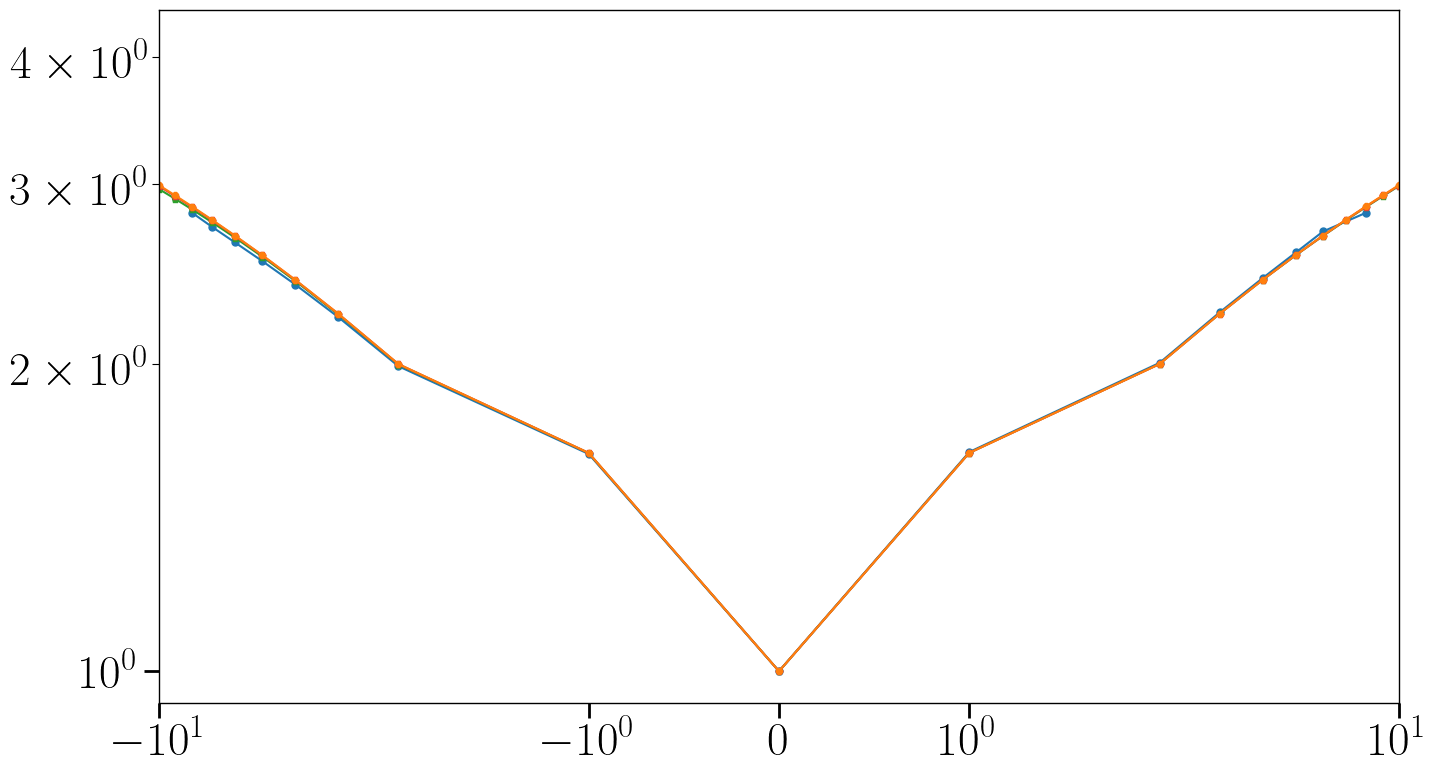

In [2]:
for size in [16, 32, 64, 128]:
    l = Lattice2D(#
        side1 = size,
        geo='squared',
        pbc=False,
        fbc_val=1.0,
        init_nw_dict=True
    )
    l.flip_sel_edges(l.nwDict['single']['G'])
    sla = SignedLaplacianAnalysis(l, initCond="all_1")
    sla.run_laplacian_dynamics()
    field2 = sla.field.reshape(l.syshape)
    cut = np.s_[l.side1//2, :]
    x_values = np.linspace(-l.side1//2, l.side1//2, num=l.side1)-.5
    plt.plot(np.rint(x_values), field2[cut]/np.min(field2[cut]))
plt.xscale('symlog')

In [ ]:
geometry = 'squared'
sizes = 2**np.arange(3, 7)
points = {}
for cell, tag in zip(['single'],
                     [r'\textbf{(a)}', r'\textbf{(b)}', r'\textbf{(c)}']):
    lattices = {}
    #
    for side in sizes:
        lattices[side] = Lattice2D(#
            side1 = side,
            geo = geometry,
            sgpath=subdatapath, 
            with_positions=True,
            pbc=False,
            fbc_val=1.0
        )
        l = lattices[side]
        # sla = SignedLaplacianAnalysis(lattices[side], initCond="all_1")
        fliplist = lattices[side].nwDict[cell]['G']
        lattices[side].flip_sel_edges(fliplist)
        # sla.run_laplacian_dynamics()
        #
        eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
        #
        if os.path.exists(eigvpath):
            printstr = f"reading {geometry}:{cell}, L = {side} "
            print(printstr+'.'*(80-len(printstr)), end="\r")
            setattr(lattices[side], 'eigV', np.load(eigvpath))
            continue
        else:
            print(f"computing {side}", end="\r")
            lattices[side].compute_k_eigvV()
            with open(eigvpath, 'wb') as f:
                np.save(f, lattices[side].eigV)
    fig, ax = plt.subplots(figsize=(15, 8))
    #
    points[cell] = defects_on_lattice_plot(sizes, lattices, ax, 'perpendicular', 
                            fit_mode=None, cell=cell)
    # field2 = 1-unravel_1d_to_2d_nodemap(sla.field, l.invnode_map, l.syshape)
    # cut = np.s_[lattices[side].side1//2, :]
    # x_values = np.linspace(-side//2, side//2, num=side)-.5
    # ax.plot(x_values, field2[cut])
ax.set_xscale('symlog')
ax.set_xlim(-2, 2)

In [ ]:
points['single']

In [ ]:
plt.plot(sizes, points['single'])

In [ ]:
geo = 'triangular'
side = 16
#
fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
for axx, cell in zip(ax, celll):
    axx.set_aspect('equal')
    axx.axis('off')
    l = Lattice2D(side, geo=geo, pbc=True, with_positions=False)
    l_draw = Lattice2D(side, geo=geo, pbc=False, with_positions=True)
    l.flip_sel_edges(l.nwDict[cell]['G'])
    l_draw.flip_sel_edges(l_draw.nwDict[cell]['G'])
    l.compute_k_eigvV()
    l.compute_k_eigvV()
    pos = l_draw.get_node_pos()
    nodeexc = (8, 8)
    nodeexc2 = (nodeexc[0]+1, nodeexc[1])
    nodeexc3 = (nodeexc[0], nodeexc[1]+1)
    if cell == 'single' and l_draw.G.has_edge(nodeexc, nodeexc2):
        edge_attributes = l_draw.G[nodeexc][nodeexc2]
        
        l_draw.G.remove_edge(nodeexc, nodeexc2)
        
        l_draw.G.add_edge(nodeexc, nodeexc3, **edge_attributes)
        l_draw.G.add_edge(nodeexc, nodeexc2)
    nx.draw_networkx_nodes(l_draw.G, pos, ax=axx, node_size=800, node_color=flip_to_positive_majority(unravel_1d_to_2d_nodemap(l.eigV[0], l.invnode_map)))
    # Draw edges on top of the nodes
    nx.draw_networkx_edges(l_draw.G, pos, ax=axx, width=3, edge_color=l_draw.get_edge_color())
    xzoom_range = [side/2-1.9, side/2+1.8]
    yzoom_range = [side/2-2.9, side/2+.8]
    axx.set_xlim(xzoom_range)
    axx.set_ylim(yzoom_range)

In [ ]:
geo = 'squared'
side = 20
#
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
for axx, cell in zip(ax, celll):
    axx.set_aspect('equal')
    axx.axis('off')
    l = Lattice2D(side, geo=geo, pbc=True, with_positions=False)
    l_draw = Lattice2D(side, geo=geo, pbc=False, with_positions=True)
    l.flip_sel_edges(l.nwDict[cell]['G'])
    l_draw.flip_sel_edges(l_draw.nwDict[cell]['G'])
    l.compute_k_eigvV()
    pos = l_draw.get_node_pos()
    node_color = flip_to_positive_majority(
             unravel_1d_to_2d_nodemap(l.eigV[0], 
                                      l.invnode_map, 
                                      dims=(l.side1, l.side2)
                                    ))
    nx.draw_networkx_nodes(l_draw.G, pos, ax=axx, node_size=800, 
                           node_color=node_color)
    nx.draw_networkx_edges(l_draw.G, pos, ax=axx, width=3,
                           edge_color=l_draw.get_edge_color())
    zoom_range = [side/2-1.9, side/2+1.8]
    axx.set_xlim(zoom_range)
    axx.set_ylim(zoom_range)

In [ ]:
geo = 'hexagonal'
l = Lattice2D(8, geo=geo, pbc=True, with_positions=True)
l_draw = Lattice2D(8, geo=geo, pbc=False, with_positions=True)

l.flip_sel_edges(l.nwDict['singleZERR']['G'])
l_draw.flip_sel_edges(l_draw.nwDict['singleZERR']['G'])
l.compute_k_eigvV()
fig, ax = plt.subplots()
ax.set_aspect('equal')
nx.draw(l_draw.G, ax=ax, node_size=800, 
        pos=l_draw.get_node_pos(), 
        edge_color=l_draw.get_edge_color(), 
        node_color=flip_to_positive_majority(unravel_1d_to_2d_nodemap(l.eigV[0], l.invnode_map, dims=(l.side1, l.side2))), 
        width=6, cmap='coolwarm_r')

In [ ]:
celll = ['single', 'singleZERR', 'singleXERR']
# Assuming Lattice2D and flip_to_positive_majority, unravel_1d_to_2d_nodemap are defined
# Assuming 'celll' is your list of cell types

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(5, 15)) # Adjust figsize as needed

for row, cell in enumerate(celll):
    for col, geo in enumerate(['squared', 'triangular']):
        axx = ax[row, col]
        axx.set_aspect('equal')
        axx.axis('off')
        side = 20 if geo == 'squared' else 16  # Adjust side based on geometry
        
        l = Lattice2D(side, geo=geo, pbc=True, with_positions=False)
        l_draw = Lattice2D(side, geo=geo, pbc=False, with_positions=True)
        l.flip_sel_edges(l.nwDict[cell]['G'])
        l_draw.flip_sel_edges(l_draw.nwDict[cell]['G'])
        l.compute_k_eigvV()
        
        pos = l_draw.get_node_pos()
        node_color = flip_to_positive_majority(unravel_1d_to_2d_nodemap(l.eigV[0], l.invnode_map, dims=(l.side1, l.side2)))
        
        # Adjust node size and edge width based on your preference or geometric specifics
        node_size = 800
        edge_width = 3
        
        if geo == 'triangular':
            # Special case for triangular geometry
            nodeexc = (8, 8)
            nodeexc2 = (nodeexc[0]+1, nodeexc[1])
            nodeexc3 = (nodeexc[0], nodeexc[1]+1)
            if cell == 'single' and l_draw.G.has_edge(nodeexc, nodeexc2):
                edge_attributes = l_draw.G[nodeexc][nodeexc2]
                
                l_draw.G.remove_edge(nodeexc, nodeexc2)
                
                l_draw.G.add_edge(nodeexc, nodeexc3, **edge_attributes)
                l_draw.G.add_edge(nodeexc, nodeexc2)
            xzoom_range = [side/2-1., side/2+1.4] 
            yzoom_range = [side/2-3.4, side/2+1.4] 
        else:
            # Zoom range for squared geometry or default
            xzoom_range = [side/2-1.3, side/2+1.3]
            yzoom_range = [side/2-2.5, side/2+2.5]
        
        nx.draw_networkx_nodes(l_draw.G, pos, ax=axx, node_size=node_size, node_color=node_color)
        nx.draw_networkx_edges(l_draw.G, pos, ax=axx, width=edge_width, edge_color=l_draw.get_edge_color())
        
        # Setting zoom range
        axx.set_xlim(xzoom_range)
        axx.set_ylim(yzoom_range)

fig.subplots_adjust(wspace=0.1, hspace=0.)  # Adjust these values as needed
fig.savefig(f"{fullpath}squared_triangl_latt{ePDF}", 
                transparent=True, bbox_inches='tight')
# plt.tight_layout()
plt.show()

### Flip squared

In [ ]:
geometry = 'squared'
side = 64
l = Lattice2D(#
            side1 = side,
            geo = geometry,
            with_positions=False
        )
l.flip_sel_edges(l.nwDict['single']['G'])
l.compute_k_eigvV()
l2 = Lattice2D(#
            side1 = side,
            geo = geometry,
            with_positions=False
        )
l2.flip_sel_edges(l.nwDict['singleZERR']['G'])
l2.compute_k_eigvV()

def func(l, shift=0):
    eigV = unravel_1d_to_2d_nodemap(l.eigV[0], l.invnode_map, l.syshape)
    slice_cut = lambda side: np.s_[:, l.side2//2]
    phi_plot = eigV[slice_cut(side)]
    x = np.linspace(-l.side1//2, l.side1//2, num=l.side1)+shift
    return x, phi_plot
x, phi_plot = func(l)
x2, phi_plot2 = func(l2, 1)

plt.plot(x, np.abs(phi_plot))
plt.plot(x2, np.abs(phi_plot2))
plt.axvline(-1.86)
# plt.xscale('symlog')

In [ ]:
geometry = 'squared'
sizes = 2**np.arange(3, 8)

for cell, tag in zip(['single', 'singleZERR', 'singleXERR'],
                     [r'\textbf{(a)}', r'\textbf{(b)}', r'\textbf{(c)}']):
    lattices = {}
    #
    for side in sizes:
        lattices[side] = Lattice2D(#
            side1 = side,
            geo = geometry,
            sgpath=subdatapath, 
            with_positions=True
        )
        fliplist = lattices[side].nwDict[cell]['G']
        lattices[side].flip_sel_edges(fliplist)
        #
        eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
        #
        if os.path.exists(eigvpath):
            printstr = f"reading {geometry}:{cell}, L = {side} "
            print(printstr+'.'*(80-len(printstr)), end="\r")
            setattr(lattices[side], 'eigV', np.load(eigvpath))
            continue
        else:
            print(f"computing {side}", end="\r")
            lattices[side].compute_k_eigvV()
            with open(eigvpath, 'wb') as f:
                np.save(f, lattices[side].eigV)
    fig, ax = plt.subplots(figsize=(15, 8), ncols=2)
    #
    defects_on_lattice_plot(sizes, lattices, ax[0], 'perpendicular', 
                            fit_mode='lmfit', cell=cell)
    defects_on_lattice_plot(sizes, lattices, ax[1], 'parallel', 
                            fit_mode='lmfit', cell=cell)
    #
    ax[0].text(0.02, .93, tag, fontsize=36, transform=fig.transFigure, verticalalignment='top')
    handles, labels = plt.gca().get_legend_handles_labels()
    handles, labels = handles[::-1], labels[::-1]
    fig.legend(handles, labels, ncols=5, fontsize=24,  bbox_to_anchor=(.98, 1.0))
    
    fig.tight_layout()
    fig.savefig(f"{fullpath}{lattices[sizes[0]].geo}_{cell}{PDF}", 
                transparent=True, bbox_inches='tight')
    plt.close('all')


In [ ]:
l = lattices[8]
nx.draw(l.G, pos=l.get_node_pos(), edge_color=l.get_edge_color(), with_labels=True)

### Flip triangular

In [ ]:
geometry = 'triangular'
sizes = 2**np.arange(3, 8)
for cell, tag in zip(['single', 'singleZERR', 'singleXERR'],
                     [r'\textbf{(d)}', r'\textbf{(e)}', r'\textbf{(f)}']):
    lattices = {}
    #
    for side in sizes:
        lattices[side] = Lattice2D(#
            side1 = side,
            geo = geometry,
            sgpath=subdatapath, 
            with_positions=True
        )
        fliplist = lattices[side].neg_weights_dict[cell]['G']
        lattices[side].flip_sel_edges(fliplist)

        #
        eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
        #
        if os.path.exists(eigvpath):
            printstr = f"reading {geometry}:{cell}, L = {side} "
            print(printstr+'.'*(80-len(printstr)), end="\r")
            setattr(lattices[side], 'eigV', np.load(eigvpath))
            continue
        else:
            print(f"computing {side}", end="\r")
            lattices[side].compute_k_eigvV()
            with open(eigvpath, 'wb') as f:
                np.save(f, lattices[side].eigV)
    fig, ax = plt.subplots(figsize=(15, 8), ncols=2)
    #
    defects_on_lattice_plot(sizes, lattices, ax[0], 'parallel', fit_mode='lmfit',
                             cell=cell, geometry=geometry)
    defects_on_lattice_plot(sizes, lattices, ax[1], 'perpendicular', fit_mode='lmfit',
                             cell=cell, geometry=geometry)
    
    ax[0].text(0.02, .93, tag, fontsize=36, transform=fig.transFigure, verticalalignment='top')
    handles, labels = plt.gca().get_legend_handles_labels()
    handles, labels = handles[::-1], labels[::-1]
    fig.legend(handles, labels, ncols=5, fontsize=24,  bbox_to_anchor=(.98, 1.0))
    
    fig.tight_layout()
    fig.savefig(f"{fullpath}{lattices[sizes[0]].geo}_{cell}{ePDF}", 
                transparent=True, bbox_inches='tight')
    plt.close('all')

In [ ]:
l = lattices[8]
edgecol  = list(map(lambda x: 'blue' if x == 1 else 'red', nx.get_edge_attributes(l.G, 'weight').values()))
edgecol2 = l.get_edge_color()
nx.draw(l.G, edge_color=edgecol2, pos=l.get_node_pos(), with_labels=True)

--------------------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters
N = 1000  # Number of particles
lattice_size = 50  # Size of the 2D lattice
kq = 1  # Combined constant for simplicity
dt = 0.01  # Time step for the simulation
noise_strength_initial = 0.1  # Initial noise strength

# Function definitions
def power_law(x, a, b):
    """Power-law function a * x^b."""
    return a * np.power(x, b)

# Simulation with a function to adjust noise and capture variance over time
def run_simulation(noise_strength):
    positions = (np.random.rand(N, 2) * (lattice_size - 1) - (lattice_size - 1) / 2)
    positions[np.linalg.norm(positions, axis=1) < 1] += 1

    variances = []
    times = []

    for step in range(1, 50001):
        r = np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)
        force_direction = -positions / r[:, None]
        force_magnitude = kq / r
        force_magnitude[r < 0.1] = 0

        acceleration = force_magnitude[:, None] * force_direction
        random_noise = noise_strength * np.random.randn(N, 2)
        positions += acceleration * dt + random_noise

        if step % 100 == 0:
            variance = np.var(r)
            variances.append(variance)
            times.append(step)
    
    return times, variances

# Run simulation with initial noise strength
times_initial, variances_initial = run_simulation(noise_strength_initial)

# Calculate and fit standard deviation from initial variance
std_dev_initial = np.sqrt(variances_initial)
params_std_initial, _ = curve_fit(power_law, times_initial[300:], std_dev_initial[300:])
exponent_std_initial = params_std_initial[1]

# Reduce noise strength and run simulation again
noise_strength_reduced = noise_strength_initial / 2
times_reduced, variances_reduced = run_simulation(noise_strength_reduced)

# # Calculate and fit standard deviation from reduced variance
std_dev_reduced = np.sqrt(variances_reduced)
params_std_reduced, _ = curve_fit(power_law, times_reduced, std_dev_reduced)
exponent_std_reduced = params_std_reduced[1]

# Plotting
# Variance with time for reduced noise
plt.figure(figsize=(10, 8))
plt.loglog(times_initial, std_dev_initial)
plt.loglog(times_initial, power_law(times_initial, *params_std_initial))

plt.title(f'Variance of Radial Distribution with Noise {noise_strength_initial}')
plt.xlabel('Log(Time)')
plt.ylabel('Log(Variance)')
plt.grid(True, which="both", ls="--")
plt.show()

# Exponents output
print(f"Exponent for standard deviation with initial noise: {exponent_std_initial}")
print(f"Exponent for standard deviation with reduced noise: {exponent_std_reduced}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N = 1000
lattice_size = 50
kq = 1
dt = 0.01
noise_strength = 0.5
positions_store = {}

def run_simulation_and_store_positions(noise_strength, store_times):
    positions = np.random.rand(N, 2) * (lattice_size - 1) - (lattice_size - 1) / 2
    positions[np.linalg.norm(positions, axis=1) < 1] += 1

    for step in range(1, 50001):
        r = np.linalg.norm(positions, axis=1)
        force_direction = -positions / r[:, None]
        force_magnitude = kq / r
        force_magnitude[r < 0.1] = 0
        acceleration = force_magnitude[:, None] * force_direction
        random_noise = noise_strength * np.random.randn(N, 2)
        positions += acceleration * dt + random_noise

        if step in store_times:
            positions_store[step] = positions.copy()

store_times = np.unique(np.logspace(np.log10(1), np.log10(50000), num=50).astype(int))
run_simulation_and_store_positions(noise_strength, store_times)

def plot_radial_distribution_at_times(times):
    fig, axs = plt.subplots(len(times), 1, figsize=(20, 30))
    if len(times) == 1:
        axs = [axs]
    for i, time in enumerate(times):
        positions = positions_store[time]
        r = np.linalg.norm(positions, axis=1)
        axs[i].hist(r, bins=50, range=(0, lattice_size/2))
        axs[i].set_title(f't={time}')
    plt.show()

plot_radial_distribution_at_times(store_times[::2])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000  # Number of particles
lattice_size = 50  # Lattice size
kq = 1  # Constant for force calculation
dt = 0.01  # Time step
noise_strength = 0.25  # Noise strength
max_steps = 50000  # Maximum number of simulation steps

# Generate initial positions uniformly distributed across the lattice
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2

positions_store = {}  # Dictionary to store positions at log-spaced times
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=50).astype(int))

def apply_periodic_boundary_conditions(positions, size):
    """Apply periodic boundary conditions to keep particles within the lattice."""
    return np.mod(positions + size / 2, size) - size / 2

for step in range(1, max_steps + 1):
    r = np.linalg.norm(positions, axis=1)
    # Avoid divisions by very small numbers near the singularity
    safe_r = np.where(r < 1e-10, 1e-10, r)
    force_direction = -positions / safe_r[:, None]
    force_magnitude = kq / safe_r
    acceleration = force_magnitude[:, None] * force_direction
    random_noise = noise_strength * np.random.randn(N, 2)
    positions += acceleration * dt + random_noise
    
    # Apply periodic boundary conditions
    positions = apply_periodic_boundary_conditions(positions, lattice_size)

    if step in store_times:
        positions_store[step] = positions.copy()

def plot_radial_distribution_at_times(times):
    for time in times:
        positions = positions_store[time]
        r = np.linalg.norm(positions, axis=1)
        plt.figure(figsize=(8, 6))
        hist, bins = np.histogram(r, bins=20)
        plt.plot(bins[1:], hist)
        plt.title(f'Radial Distribution at t={time}')
        plt.xlabel('Radius')
        plt.ylabel('Frequency')
        plt.show()

plot_radial_distribution_at_times(store_times[::10])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
lattice_size = 100
kq = 10
dt = 0.01
noise_strength = 2
max_steps = 50000
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, size):
    return np.mod(pos + size / 2, size) - size / 2

for step in range(1, max_steps + 1):
    r = np.sqrt(np.sum(positions**2, axis=1))
    force_dir = -positions / r[:, None]
    force_mag = kq / r
    force = force_mag[:, None] * force_dir
    positions += dt * force + noise_strength * np.random.randn(N, 2)
    positions = apply_pbc(positions, lattice_size)
    if step in store_times:
        positions_store[step] = positions.copy()

fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, step in zip(axes.flat, store_times):
    ax.scatter(positions_store[step][:, 0], positions_store[step][:, 1], s=1)
    ax.set_title(f't={step}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
lattice_size = 100
kq = 10  # Adjusted for visible effect of the potential
dt = 0.01
noise_strength = 1
max_steps = 50000
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, size):
    return np.mod(pos + size / 2, size) - size / 2

for step in range(1, max_steps + 1):
    r = np.linalg.norm(positions, axis=1)
    force_direction = positions / r[:, None]
    # Correct application of force due to logarithmic potential
    force = kq * force_direction  # The magnitude is kq, and direction is towards the origin
    positions += dt * force + noise_strength * np.random.randn(N, 2)
    positions = apply_pbc(positions, lattice_size)
    if step in store_times:
        positions_store[step] = positions.copy()

fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, step in zip(axes.flat, store_times):
    ax.scatter(positions_store[step][:, 0], positions_store[step][:, 1], s=1)
    ax.set_title(f't={step}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000
lattice_size = 100
particle_radius = 0.5  # Assuming a certain radius to define non-overlapping condition
kq = 1
dt = 0.01
noise_strength = 1
max_steps = 5000
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, size):
    return np.mod(pos + size / 2, size) - size / 2

def prevent_overlap(positions, min_distance):
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            distance = np.linalg.norm(positions[i] - positions[j])
            if distance < min_distance:
                direction = (positions[i] - positions[j]) / distance
                overlap = min_distance - distance
                positions[i] += direction * overlap / 2
                positions[j] -= direction * overlap / 2
    return positions

for step in range(1, max_steps + 1):
    r = np.linalg.norm(positions, axis=1)
    force_direction = positions / r[:, None]
    force = kq * force_direction
    positions += dt * force + noise_strength * np.random.randn(N, 2)
    positions = apply_pbc(positions, lattice_size)
    positions = prevent_overlap(positions, 2 * particle_radius)
    if step in store_times:
        positions_store[step] = positions.copy()

fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, step in zip(axes.flat, store_times):
    ax.scatter(positions_store[step][:, 0], positions_store[step][:, 1], s=1)
    ax.set_title(f't={step}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 3000
lattice_size = 100
kq = 1
dt = 0.01
noise_strength = 1
max_steps = 50000
min_dist = 2.0  # Approximate minimum distance to consider non-overlapping

# Initialize positions
positions = np.random.rand(N, 2) * lattice_size - lattice_size / 2
store_times = np.unique(np.logspace(np.log10(1), np.log10(max_steps), num=20).astype(int))
positions_store = {}

def apply_pbc(pos, lattice_size):
    return (pos + lattice_size / 2) % lattice_size - lattice_size / 2

# Store initial positions
positions_store[0] = positions.copy()

# Simulation loop
for step in range(1, max_steps + 1):
    # Calculate movement
    noise = noise_strength * np.random.randn(N, 2)
    displacement = dt * kq * (positions / np.linalg.norm(positions, axis=1, keepdims=True)) + noise
    new_positions = positions + displacement

    # Apply periodic boundary conditions
    new_positions = apply_pbc(new_positions, lattice_size)

    # Attempt to revert moves that cause overlaps
    for i in range(N):
        for j in range(i + 1, N):
            if np.linalg.norm(new_positions[i] - new_positions[j]) < min_dist:
                new_positions[i] = positions[i]
                new_positions[j] = positions[j]

    positions = new_positions.copy()

    if step in store_times:
        positions_store[step] = positions.copy()

# Plotting
fig, axes = plt.subplots(4, 5, figsize=(20, 16), constrained_layout=True)
for ax, time in zip(axes.flat, sorted(positions_store.keys())):
    ax.scatter(positions_store[time][:, 0], positions_store[time][:, 1], s=1)
    ax.set_title(f't={time}')
    ax.set_xlim(-lattice_size / 2, lattice_size / 2)
    ax.set_ylim(-lattice_size / 2, lattice_size / 2)
    ax.axis('off')
plt.show()


In [ ]:
# fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
# for axx in ax:
#     axx.set_aspect('equal')
#     axx.axis('off')
# l = lattices[sizes[3]] 
# im = ax[0].imshow(unravel_1d_to_2d_nodemap(lattices[sizes[3]].eigV[0], 
#                                         lattices[sizes[3]].invnode_map), 
#                 cmap=restr_twilight)
# nx.draw(l.G, ax=ax[1], pos = l.get_pos(), edge_color=l.get_edge_color(), node_size=10)